# Dataframe

A DataFrame is two dimensional data structure where the data is arranged in the tabular format in rows and columns

#### DataFrame features:

- Columns can be of different data types
- Size of dataframe can be changes
- Axes(rows and columns) are labeled
- Arithmetic operations can be performed on rows and columns

### Creating Dataframes

In [ ]:
employees = {"Name" : ["Jack", "Bill", "Lizie", "Jane", "George"],
            "Designation" : ["HR", "Manager", "Developer", "Intern", "Manager"],
            "Salary": [40000, 60000, 25000, 12000, 70000]}

df = pd.DataFrame(employees)
df

### Accessing Dataframes

In [ ]:
df.Name

In [ ]:
df["Name"]

In [ ]:
df[["Name", "Salary"]]

### Operations on dataframes

###### Ex. Average Salary

In [ ]:
df.Salary.mean()

###### Ex. Average Salary of managers

In [ ]:
df[df.Designation == "Manager"].Salary.mean()

### Concataneting and Merging Dataframes

In [ ]:
df_jan = pd.DataFrame({"Order ID" : range(101, 111), "Sales" : np.random.randint(10000, 50000, 10)})
df_feb = pd.DataFrame({"Order ID" : range(111, 121), "Sales" : np.random.randint(10000, 50000, 10)})
df_mar = pd.DataFrame({"Order ID" : range(121, 131), "Sales" : np.random.randint(10000, 50000, 10)})

#### Concatenate
pd.concat(`tuple of dfs`, `ignore_index = False`, `axis=0`)

In [ ]:
pd.concat((df_jan, df_feb, df_mar), ignore_index=True)

In [ ]:
pd.concat((df_jan, df_feb, df_mar), axis=1)

#### Merging Dataframes

`df1.merge(df2, how="", left_on="", right_on="", left_index= "" , right_index="")`

In [ ]:
df_emp = pd.DataFrame({"Name" : ["Jack", "Bill", "Lizie", "Jane", "George"],
            "Designation" : ["HR", "Manager", "Developer", "Intern", "Manager"]})
df_emp

In [ ]:
base_salaries = pd.DataFrame({"Designation" : ["HR", "Developer", "Manager", "Senior Manager"],
            "Salary": [40000, 25000, 70000, 1000000]})
base_salaries

#### Inner Merge

In [ ]:
df_emp.merge(base_salaries, how="inner", on = "Designation")  # returns only common rows

#### Left Merge

In [ ]:
df_emp.merge(base_salaries, how="left", on = "Designation")  # returns all rows from left table

#### Right Merge

In [ ]:
df_emp.merge(base_salaries, how="right", on = "Designation")  # returns all rows from right table

#### Outer Merge

In [ ]:
df_emp.merge(base_salaries, how="outer", on = "Designation")  # returns all rows from both tables

### Read data from files

###### Ex. Read data from `coffee_sales.csv`

###### Approach 1

In [ ]:
df = pd.read_csv("coffee_sales.csv", header=3)
df.drop(columns=['Unnamed: 0'], inplace=True)
df

### Drop null rows
df.dropna(`axis = 0`, `how = "any"`, `inplace = False`)
- axis 0 for row or 1 for column
- how - {any or all}

In [ ]:
df = pd.read_csv("coffee_sales.csv")
df.dropna(how="all", inplace=True)
df.dropna(how="all", axis=1, inplace=True)
df.columns = df.iloc[0]
df

### Renaming a Columns

###### Rename Columns (column 5 - 8 are not accessible)

In [ ]:
headers = ["ShopID", "Year/Month", "Product", "Product Type", "State", "Target Profit", "Target Sales", "Profit", "Sales"]
df.columns = headers

In [ ]:
df_customer = pd.read_csv("customers.txt", header=None)
df_customer.columns = ["Customer ID", "FName", "LName", "Age", "Profession"]
df_customer.head()

#### Rename Single Column

In [ ]:
df_customer.rename({"FName" : "First Name", "LName" : "Last Name"}, axis=1)

### Understanding Data in Dataframe

- `df.shape` - gives the size of the dataframe in the format (row_count x column_count)
- `df.dtypes` - returns a Series with the data type of each column
- `df.info()` - prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
- `df.head()` - prints the first 5 rows of you dataset including column header and the content of each row
- `df.tail()` - prints the last 5 rows of you dataset including column header and the content of each row

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.head(3)

In [ ]:
df.tail()

In [ ]:
df.tail(3)

### Cleaning data

In [ ]:
trans_obj = str.maketrans("", "", "$,")
df.Sales = df.Sales.str.translate(trans_obj).astype(float)
df.Profit = df.Profit.str.translate(trans_obj).astype(float)
df["Target Profit"] = df["Target Profit"].str.translate(trans_obj).astype(float)
df["Target Sales"] = df["Target Sales"].str.translate(trans_obj).astype(float)
df.head()

### Working with **null** values

`df.isna()` - Detect missing values. Return a boolean same-sized object indicating if the values are NA.

`df.fillna(value=None, inplace=False)` - Fill NA/NaN values using the specified method.

In [ ]:
df.isna().any()

In [ ]:
df.isna().sum()

In [ ]:
df["Target Profit"].fillna(0, inplace=True)  # older versions

In [ ]:
df.fillna({"Target Profit" : 0}, inplace=True)  # new versions

### Replacing values

df.replace(old_value, new_value, inplace=True)

In [ ]:
df.City.replace({"Mumbai" : "Bombay"})

### Adding a new Column by calculation

###### Ex. Create columns showing `Sales` and `Profit` targets achieved

In [ ]:
# Level of detail - Monthly data from Franchises and Product in each Franchise

In [ ]:
df["Sales Target Status"] = np.where(df.Sales > df["Target Sales"], "Achieved", "Not Achieved")
df.head()

###### Ex. Count the number times Targets are achieved

In [ ]:
df["Sales Target Status"].value_counts()

In [ ]:
df["Sales Target Status"].value_counts(normalize=True)* 100

### Creating a bar chart to view Target Status

#### using pandas

In [ ]:
result = df["Sales Target Status"].value_counts(normalize=True)* 100
result.plot(kind = "bar", color = ["palegreen", "coral"])
plt.title("Counts per City", size = 10, color = "darkslategray")

plt.yticks(size = 6,  color = "darkslategray")
plt.xticks(size = 6,  color = "darkslategray")
plt.xlabel("")
plt.ylabel("")
plt.show()

#### using seaborn

In [ ]:
sns.countplot(df, x = "Sales Target Status")
plt.show()

In [ ]:
sns.countplot(df, x = "City", hue = "Sales Target Status", palette=["coral", "palegreen"])
plt.legend(fontsize  = 6)
plt.title("Counts per City", size = 10, color = "darkslategray")

plt.yticks(size = 6,  color = "darkslategray")
plt.xticks(size = 6,  color = "darkslategray")
plt.xlabel("")
plt.ylabel("")
plt.show()

### Setting and Resetting Index

#### Seting Index
`df.set_index(keys, drop=True, inplace=False,)`- Set the DataFrame index (row labels) using one or more existing columns or arrays (of the correct length). The index can replace the existing index or expand on it.

In [ ]:
df.set_index("Franchise", inplace=True)

In [ ]:
df.head()

#### Using loc to retrive data

- loc is label-based
- specify the name of the rows and columns that we need to filter out

###### Ex. Extract data for M1 franchise

In [ ]:
df.loc["M1"]

###### Ex. Extract Sales and Profit data for M1 franchise

In [ ]:
df.loc["M1", ["Sales", "Profit"]]

###### Ex. Extract Sales and Profit data for M1 & M2 franchise

In [ ]:
df.loc[["M1", "M2"], ["Sales", "Profit"]]

#### Using iloc to retrive data

- iloc is integer index-based
- specify rows and columns by their integer index.

###### Ex. Extract data for first 5 rows

In [ ]:
df.iloc[0:5]

###### Ex. Extract data for rown index 10 - 15 rows

In [ ]:
df.iloc[10:16]

###### Ex. Extract data for rows index 10 - 15 rows  and first 3 cols

In [ ]:
df.iloc[10:16, 0:3]

#### Resetting Index

`df.reset_index(level=None, drop=False, inplace=False,)` - Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

In [ ]:
# Final Code - 

# all imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting default parameters
plt.rcParams["figure.figsize"] = (3, 2)

df = pd.read_csv("coffee_sales.csv", header=3) # Read data
df.drop(columns=['Unnamed: 0'], inplace=True)  # drop unwanted columns
df.dropna(how="all", inplace=True)  # drop blank rows

# data cleaning
trans_obj = str.maketrans("", "", "$,")
df.Sales = df.Sales.str.translate(trans_obj).astype(float)
df.Profit = df.Profit.str.translate(trans_obj).astype(float)
df["Target Profit"] = df["Target Profit"].str.translate(trans_obj).astype(float)
df["Target Sales"] = df["Target Sales"].str.translate(trans_obj).astype(float)
df.Date = pd.to_datetime(df.Date, format = "mixed")

# Replace nulls
df.fillna({"Target Profit" : 0}, inplace=True)

df["Sales Target Status"] = np.where(df.Sales > df["Target Sales"], "Achieved", "Not Achieved")
df.insert(1, "Year", df.Date.dt.year)
df.insert(2, "Month", df.Date.dt.month_name())
df.head(2)

### Working with dates

In [ ]:
df.Date = pd.to_datetime(df.Date, format = "mixed")
df.head(2)

In [ ]:
df.Date.dt.strftime("%d/%m/%Y")

#### Insert a column in between
df.insert(`index`, `column_name`, `default_value`)

###### Create columns Year and Month - extract data using pd.DatetimeIndex

In [ ]:
df.insert(1, "Year", df.Date.dt.year)
df.insert(2, "Month", df.Date.dt.month_name())
df.head(2)

###### Ex. Extract data for year 2021

In [ ]:
df[df.Year == 2021]

In [ ]:
df[df.Date == "2021"]

###### Ex. Extract data from jan-2021 to Apr-2022

In [ ]:
df[df.Date.between("2021-01", "2022-04")]

###### Ex. Extract data for January

In [ ]:
df[df.Date.dt.month_name() == "January"]

###### Ex. Extract data for months (jan, apr and nov)

In [ ]:
df[df.Date.dt.month_name().isin(("January", "April", "November"))]

### Ranking and Sorting Dataframes

###### Ex. Rank the products in descending order of `Sales`

In [ ]:
df.sort_values("Sales", ascending=False)

###### Ex. Sort the data in ascending order of `Rank`

In [ ]:
df["Sales"].rank()  # Note - works only on series object

### Grouping Dataframes

##### `df.groupby(by=None, as_index=True, sort=True, dropna=True)`

###### using matplotlib.pyplot

In [ ]:
result = df.groupby("Product")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(7, 2))
plt.bar(result.index, result.values,  width = 0.6, color = "teal", edgecolor = "orange")

plt.title("Sales across Products", size = 10, color = "darkslategray")
plt.grid(axis="y", color = "orange", ls = "--", alpha = 0.4)

plt.xticks(size = 6,  color = "darkslategray", rotation = 20)
y_ticks = np.arange(0, max(result.values) + 10000, 20000).astype(int)
y_labels = (y_ticks // 1000).astype(str) + "K"
plt.yticks(y_ticks, y_labels, size = 6,  color = "darkslategray")
plt.show()

###### using pandas plot()

In [ ]:
result = df.groupby("Product")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(7, 2))
result.plot(kind = "bar", width = 0.6, color = "teal", edgecolor = "orange")  # using pandas plot function

plt.title("Sales across Products", size = 10, color = "darkslategray")
plt.grid(axis="y", color = "orange", ls = "--", alpha = 0.4)

plt.xticks(size = 6,  color = "darkslategray", rotation = 20)
y_ticks = np.arange(0, max(result.values) + 10000, 20000).astype(int)
y_labels = (y_ticks // 1000).astype(str) + "K"
plt.yticks(y_ticks, y_labels, size = 6,  color = "darkslategray")
plt.show()

###### using seaborn 

In [ ]:
plt.figure(figsize=(7, 2))

sns.barplot(data = df, x = "Product", y = "Sales", estimator="sum", color="teal", errorbar=None)

plt.title("Sales across Products", size = 10, color = "darkslategray")
plt.grid(axis="y", color = "orange", ls = "--", alpha = 0.4)

plt.xticks(size = 6,  color = "darkslategray", rotation = 20)
plt.yticks(size = 6,  color = "darkslategray")
plt.show()

In [ ]:
result = df.groupby("Product")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(7, 2))
sns.barplot(result, color = "teal")

plt.title("Sales across Products", size = 10, color = "darkslategray")
plt.grid(axis="y", color = "orange", ls = "--", alpha = 0.4)

plt.xticks(size = 6,  color = "darkslategray", rotation = 20)
y_ticks = np.arange(0, max(result.values) + 10000, 20000).astype(int)
y_labels = (y_ticks // 1000).astype(str) + "K"
plt.yticks(y_ticks, y_labels, size = 6,  color = "darkslategray")
plt.show()

In [ ]:
plt.figure(figsize=(7, 2))
sns.barplot(data = df, x = "City", hue = "Sales Target Status", y = "Sales", estimator="sum", errorbar=None)
plt.show()

#### use of `agg()`

In [ ]:
result = df.groupby("Product")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
result.plot(kind = "bar")

In [ ]:
result = df.groupby("Product")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
ax = result.plot(kind = "bar", subplots = True, figsize=(12, 4))
plt.xticks(size = 6,  color = "darkslategray", rotation = 0)
y_ticks = np.arange(0, result.Sales.max()+10000, 20000).astype(int)
y_labels = (y_ticks // 1000).astype(str) + "K"
ax[0].set_yticks(y_ticks, y_labels, size = 6,  color = "darkslategray")

y_ticks = np.arange(0, result.Profit.max()+10000, 10000).astype(int)
y_labels = (y_ticks // 1000).astype(str) + "K"
ax[1].set_yticks(y_ticks, y_labels, size = 6,  color = "darkslategray")

plt.show()

###### Ex. Extract total and avg sales and total profits

In [14]:
result = df.groupby("Product").agg({"Sales" : ["sum", "mean"], "Profit" : "sum", "Franchise" : "nunique"})
result.columns = ["Total Sales", "Avg Sales", "Total Profit", "Franchises"]
result

,Total Sales,Avg Sales,Total Profit,Franchises
Product,,,,
Amaretto,30425.0,140.856481,5915.0,3
Caffe Latte,35899.0,166.199074,11375.0,3
Caffe Mocha,76468.0,177.009259,15564.0,6
Chamomile,70894.0,196.927778,25351.0,5
Colombian,116547.0,269.784722,50218.0,6
Darjeeling,68788.0,191.077778,27129.0,5
Decaf Espresso,82442.0,190.837963,30591.0,6
Decaf Irish Cream,58456.0,162.377778,13029.0,5
Earl Grey,80448.0,223.466667,28811.0,5


###### Ex. Visualise sales over years and months  - trend

In [ ]:
plt.figure(figsize=(12, 2))
sns.lineplot(df, x = "Date", y = "Sales", estimator="sum", errorbar=None)
plt.show()

###### Ex. Extract Monthly Sales - sesonality

<Axes: xlabel='Month'>

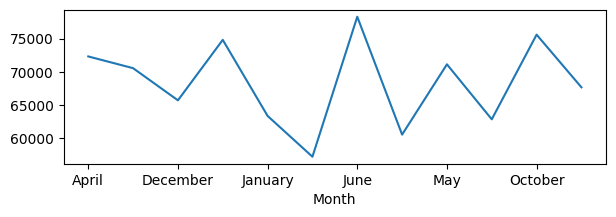

In [26]:
result = df.groupby("Month")["Sales"].sum()
result.plot(kind = "line", figsize = (7, 2))

### Analysing Dataframes

- univariate analysis - boxplot, histogram, value_counts(), countplot, describe()
- bivariate analysis
    - categorial X numerical - barchart, piechart
    - 2 numerical - scatter plot
    - 2 categorial - crosstab
- multivariate - pivot table

### Univariate Analysis

#### Summary Statistics

`df.describe()` **- Generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.**

`df.value_counts(normalize = False)` **- returns a Series containing counts of unique rows in the DataFrame**

#### Histogram

#### Box and Whisker Plot

<img src = "images/boxplot.jpg" width = 800 align = left>


### Bivariate Analysis

`pd.crosstab(index, columns, values=None, aggfunc=None normalize=False)` **- Computes a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.**

###### Ex. Number of franchise where a product is sold across each state

###### Ex. Product and the number of time Sales Target achieved

`df.pivot_table(values=None, index=None, columns=None, aggfunc='mean')`  **- creates a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.**

#### Barchart

###### Display Sales across products

#### Piechart

#### Scatter Plot

#### Line Chart

###### Ex. Plot line chart showing monthly sales

#### using pandas

#### using seaborn